# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Load the Data

In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_excel("Online Retail.xlsx")

In [44]:
# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


# Perform data cleaning

In [45]:
# Handling missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [46]:
# Removing redundant or unnecessary columns
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [47]:
# Explore basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(df.describe().T)


Basic statistics of the dataset:
               count          mean          std      min       25%       50%  \
Quantity    401604.0     12.183273   250.283037 -80995.0      2.00      5.00   
UnitPrice   401604.0      3.474064    69.764035      0.0      1.25      1.95   
CustomerID  401604.0  15281.160818  1714.006089  12346.0  13939.00  15145.00   

                 75%      max  
Quantity       12.00  80995.0  
UnitPrice       3.75  38970.0  
CustomerID  16784.00  18287.0  


# Data visualization

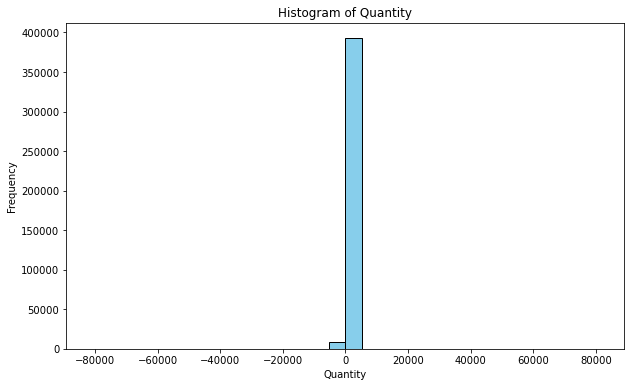

In [48]:
# Histogram of Quantity
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

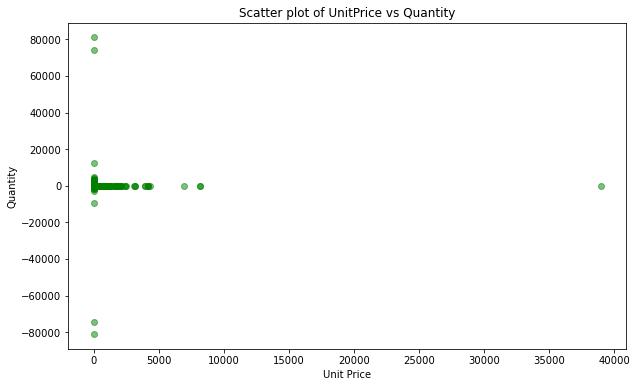

In [49]:
# Scatter plot of UnitPrice vs Quantity
plt.figure(figsize=(10, 6))
plt.scatter(df['UnitPrice'], df['Quantity'], alpha=0.5, color='green')
plt.title('Scatter plot of UnitPrice vs Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.show()

In [50]:
# Sales trends over time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

monthly_sales = df.groupby('Month')['Quantity'].sum()
weekday_sales = df.groupby('DayOfWeek')['Quantity'].sum()

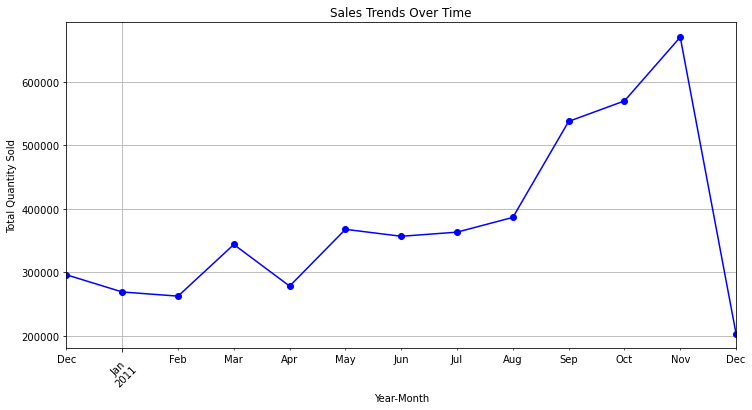

In [29]:
plt.figure(figsize=(12, 6))
sales_trends.plot(kind='line', marker='o', color='blue')
plt.title('Sales Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

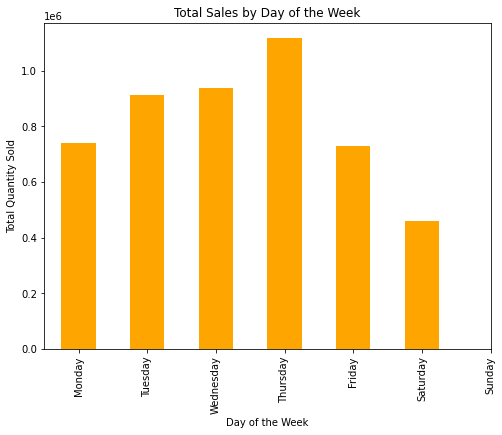

In [51]:
plt.figure(figsize=(8, 6))
weekday_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

In [54]:
# Busiest months and days of the week
# Create 'YearMonth' column
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Busiest months and days of the week
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
busiest_months = df.groupby('YearMonth')['Quantity'].sum().idxmax()
busiest_days = df.groupby('DayOfWeek')['Quantity'].sum().idxmax()

print("\nBusiest Months in Terms of Sales:")
print(busiest_months)
print("\nBusiest Day of the Week in Terms of Sales:")
print(busiest_days)



Busiest Months in Terms of Sales:
2011-11

Busiest Day of the Week in Terms of Sales:
Thursday


In [55]:
# Top-selling products and countries
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_countries = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

print("\nTop-selling products:")
print(top_products)

print("\nTop countries based on quantity sold:")
print(top_countries)


Top-selling products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33386
POPCORN HOLDER                        30492
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25305
PACK OF 60 PINK PAISLEY CAKE CASES    24129
Name: Quantity, dtype: int64

Top countries based on quantity sold:
Country
United Kingdom    3994870
Netherlands        200128
EIRE               136187
Germany            117341
France             109806
Australia           83643
Sweden              35632
Switzerland         29778
Spain               26817
Japan               25218
Name: Quantity, dtype: int64


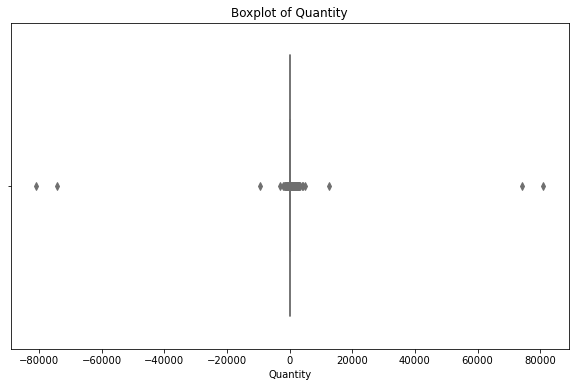

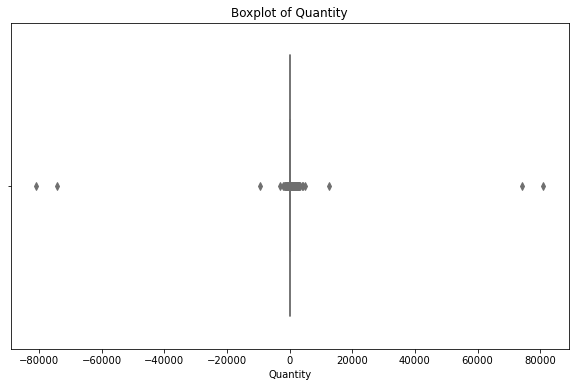

In [56]:
# Identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df['Quantity'], color='skyblue')
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')
plt.show()# Identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df['Quantity'], color='skyblue')
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')
plt.show()

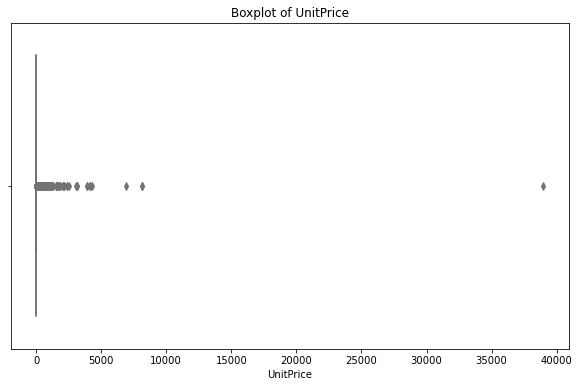

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['UnitPrice'], color='lightgreen')
plt.title('Boxplot of UnitPrice')
plt.xlabel('UnitPrice')
plt.show()

# Conclusion and summary

In [58]:
print("\nConclusion and Summary:")
print("The dataset provides transactional data of an online retail store.")
print("Data cleaning was performed by handling missing values and removing duplicates.")
print("Exploratory data analysis revealed insights into sales trends over time, top-selling products, and countries.")
print("Outliers were identified in the Quantity and UnitPrice columns.")


Conclusion and Summary:
The dataset provides transactional data of an online retail store.
Data cleaning was performed by handling missing values and removing duplicates.
Exploratory data analysis revealed insights into sales trends over time, top-selling products, and countries.
Outliers were identified in the Quantity and UnitPrice columns.
